In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import math
import time 

from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# Numerical set up

In [2]:
# Parameters to be defined for different grid size and conductivity
dt = 10      # Time step (s)
dx = 1       # Grid size in x      
Dx = 0.1   # Conductivity in x    
# Parameters for the computational domain
alpha = 1    # relaxation coefficient for Jacobi iteration (from 0 to 1)
nx = 128     # Grid point in x
ub = 1       # Velocity (1m/s)

In [3]:
# the weights matrix
w1 = np.zeros([1,2,1])
w2 = np.zeros([1,3,1])
w1[0,:,0] = 0.5
w2[0][0][0] = - ub*dt/(dx) - Dx*dt/dx**2
w2[0][1][0] = 1 + 2*Dx*dt/dx**2 + ub*dt/(dx)
w2[0][2][0] =  - Dx*dt/dx**2
print('Sum up the weights of filter:', sum(sum(sum(w2))))

Sum up the weights of filter: 1.0


# Weights of layers

In [4]:
kernel_initializer_1 = tf.keras.initializers.constant(w1)
kernel_initializer_2 = tf.keras.initializers.constant(w2)
bias_initializer = tf.keras.initializers.constant(np.zeros((1,)) )

# Jacobi matrix 

In [5]:
CNN3D_A_128 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(nx, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer)
])

CNN3D_A_64 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(64, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_32 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(32, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_16 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(16, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_8 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(8, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_4 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(4, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_2 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(2, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_1 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(1, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

# Restriction matrix

In [6]:
CNN3D_res_128 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(nx, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),   
])    
CNN3D_res_64 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(64, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),  
])
CNN3D_res_32 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(32, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer), 
])
CNN3D_res_16 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(16, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer), 
])
CNN3D_res_8 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(8, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),
])
CNN3D_res_4 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(4, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),
])
CNN3D_res_2 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(2, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),
])

# Prolongation matrix

In [7]:
CNN3D_prol_1 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(1, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),
])

CNN3D_prol_2 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(2, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),
])

CNN3D_prol_4 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(4, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),
])

CNN3D_prol_8 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(8, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),   
])

CNN3D_prol_16 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(16, 1)),
         tf.keras.layers.UpSampling1D(size=(2)), 
])

CNN3D_prol_32 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(32, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),   
])

CNN3D_prol_64 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(64, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),
])

# Load data 

In [8]:
# you might need incorporate with SFC code here
T = np.zeros([nx])
for i in range(40):
    T[i+43] = 1 

In [9]:
input_shape = (1,nx,1)
values = tf.zeros(input_shape)
print('values.shape: ', values.shape)
values = tf.Variable(values)[0,:,0].assign(tf.Variable(values)[0,:,0]+tf.convert_to_tensor(T.astype('float32')))

values.shape:  (1, 128, 1)



# Initial condition

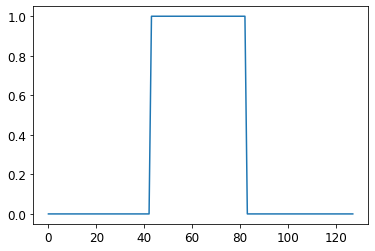

In [10]:
plt.plot(values[0,:,0])

# Multigrid network with skipping layer

In [11]:
start = time.time()
b = values           # only for one time step
multi_itr = 200     # multigrid iteration
j_itr = 1            # jacobi iteration 
for multi_grid in range(multi_itr):    
    w = np.zeros([1,1,1])
# --------- Calculate Residual based on initial guess --------  
    r = CNN3D_A_128(values) - b 
# ------------------------------------------------------------  

# --------- Interpolate Residual from finer to coaser mesh --------  
    r_64 = CNN3D_res_128(r) 
    r_32 = CNN3D_res_64(r_64) 
    r_16 = CNN3D_res_32(r_32) 
    r_8 = CNN3D_res_16(r_16) 
    r_4 = CNN3D_res_8(r_8) 
    r_2 = CNN3D_res_4(r_4) 
    r1 = CNN3D_res_2(r_2)    
# -----------------------------------------------------------------      

# --------- Interpolate Residual from coaser to finer mesh --------  
    for Jacobi in range(j_itr):
        w = w - CNN3D_A_1(w)/w2[0][1][0] + r1/w2[0][1][0]
    w_2 = CNN3D_prol_1(w)                   
    for Jacobi in range(j_itr):
        w_2 = w_2 - CNN3D_A_2(w_2)/w2[0][1][0] + r_2/w2[0][1][0]
    w_4 = CNN3D_prol_2(w_2) 
    for Jacobi in range(j_itr):
        w_4 = w_4 - CNN3D_A_4(w_4)/w2[0][1][0] + r_4/w2[0][1][0]
    w_8 = CNN3D_prol_4(w_4) 
    for Jacobi in range(j_itr):
        w_8 = w_8 - CNN3D_A_8(w_8)/w2[0][1][0] + r_8/w2[0][1][0]
    w_16 = CNN3D_prol_8(w_8) 
    for Jacobi in range(j_itr):
        w_16 = w_16 - CNN3D_A_16(w_16)/w2[0][1][0] + r_16/w2[0][1][0]
    w_32 = CNN3D_prol_16(w_16) 
    for Jacobi in range(j_itr):
        w_32 = w_32 - CNN3D_A_32(w_32)/w2[0][1][0] + r_32/w2[0][1][0]
    w_64 = CNN3D_prol_32(w_32)
    for Jacobi in range(j_itr):
        w_64 = w_64 - CNN3D_A_64(w_64)/w2[0][1][0] + r_64/w2[0][1][0]
    w_128 = CNN3D_prol_64(w_64)
    w_128 = w_128 - CNN3D_A_128(w_128)/w2[0][1][0] + r/w2[0][1][0]
# ----------------------------------------------------------------- 

# --------- Correct initial guess --------  
    values = values - w_128 
    values = values - CNN3D_A_128(values)/w2[0][1][0] + b/w2[0][1][0]
# ----------------------------------------  
end = time.time()
print('Computational time(s):',(end-start))
print('Multigrid iterations:', multi_itr)
print('Jacobi iterations:', j_itr)

Computational time(s): 8.562378644943237
Multigrid iterations: 200
Jacobi iterations: 1


### Residual on 4x4 grid

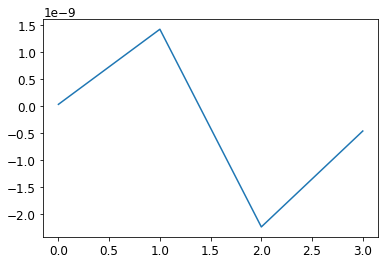

In [12]:
plt.plot(w_4[0,:,0])

### Residual on 8x8 grid

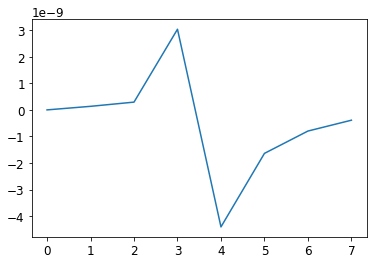

In [13]:
plt.plot(w_8[0,:,0])

### Residual on 16x16 grid

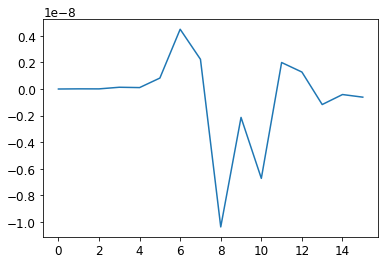

In [14]:
plt.plot(w_16[0,:,0])

### Residual on 32x32 grid

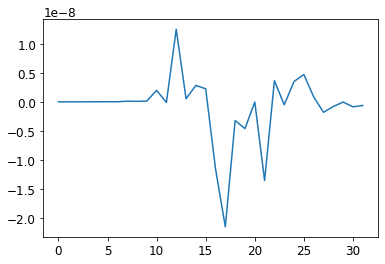

In [15]:
plt.plot(w_32[0,:,0])

### Residual on 64x64 grid

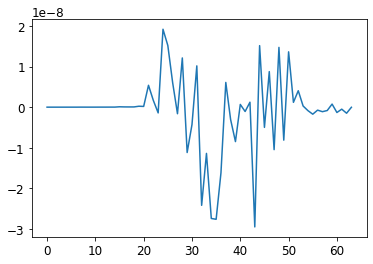

In [16]:
plt.plot(w_64[0,:,0])

### Residual on 128x128 grid

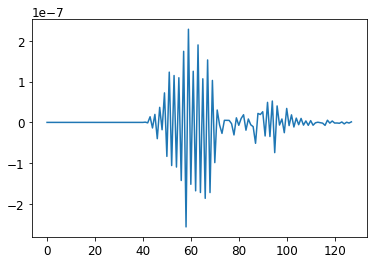

In [17]:
plt.plot(w_128[0,:,0])

### Steady state results

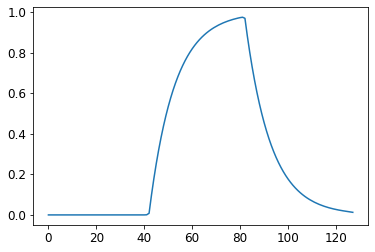

In [18]:
plt.plot(values[0,:,0])